# **Sobre o conjunto de dados**

A Uber é uma empresa multinacional de transporte que opera uma plataforma que conecta passageiros a motoristas por meio de um aplicativo. Foi fundada em 2009 e, desde então, tornou-se um dos exemplos mais conhecidos de serviço de transporte por aplicativo. A Uber permite que os usuários solicitem uma viagem de sua localização atual até um destino desejado usando o smartphone. O aplicativo conecta o usuário a um motorista disponível na região, e o motorista chega para buscar o passageiro.

A Uber oferece vários tipos de serviços, incluindo UberX (carro padrão), UberXL (veículos maiores), UberBlack (veículos de luxo) e UberPOOL (viagens compartilhadas com outros passageiros viajando na mesma direção). As tarifas das viagens são calculadas com base em fatores como distância percorrida, tempo gasto na viagem e demanda no momento da solicitação.

A Uber ganhou popularidade por sua conveniência, facilidade de uso e preços competitivos em comparação com os serviços de táxi tradicionais. Expandiu suas operações para diversas cidades ao redor do mundo e também introduziu outros serviços, como entrega de comida (Uber Eats) e entrega de encomendas (Uber Connect).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Carregar os Dados**

In [4]:
uber = pd.read_csv('Dados/UberDataset.csv')
uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# **Analise inicial**

In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
uber.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# **Tratamento de Valores Ausentes**

In [7]:
uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
def tratar_valores_ausenntes(df):
  for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
      media = df[col].mean()
      df[col].fillna(media, inplace=True)
    elif df[col].dtype == 'object':
      moda = df[col].mode()[0]
      df[col].fillna(moda, inplace=True)
  return df

In [9]:
uber =  tratar_valores_ausenntes(uber)

C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\2891055969.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)
C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\2891055969.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

# **Pré Processamento de Dados**

In [10]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'], format='mixed', errors='coerce')
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'], format='mixed', errors='coerce')

## **Novas Features**

Variáel que represnta o periodo da chamada no dia

In [12]:
uber.START_DATE

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
1155                   NaT
Name: START_DATE, Length: 1156, dtype: datetime64[ns]

In [13]:
def periodo_dia(hour):
    if 5 <= hour < 12:
        return "MORNING"
    elif 12 <= hour < 17:
        return "AFTERNOON"
    if 17 <= hour < 21:
        return "EVENING"
    else:
        return "NIGHT"

In [14]:
uber['PERIOD_OF_DAY'] = uber['START_DATE'].dt.hour.apply(periodo_dia)

In [15]:
print(uber[['START_DATE', 'PERIOD_OF_DAY']])

              START_DATE PERIOD_OF_DAY
0    2016-01-01 21:11:00         NIGHT
1    2016-01-02 01:25:00         NIGHT
2    2016-01-02 20:25:00       EVENING
3    2016-01-05 17:31:00       EVENING
4    2016-01-06 14:42:00     AFTERNOON
...                  ...           ...
1151 2016-12-31 13:24:00     AFTERNOON
1152 2016-12-31 15:03:00     AFTERNOON
1153 2016-12-31 21:32:00         NIGHT
1154 2016-12-31 22:08:00         NIGHT
1155                 NaT         NIGHT

[1156 rows x 2 columns]


Variáel que represnta o mês da chamada da corrida

In [16]:
uber['MONTH_OF_THE_RIDE'] = uber.START_DATE.dt.month_name()

In [17]:
uber['MONTH_OF_THE_RIDE']

0        January
1        January
2        January
3        January
4        January
          ...   
1151    December
1152    December
1153    December
1154    December
1155         NaN
Name: MONTH_OF_THE_RIDE, Length: 1156, dtype: object

Variáel que represnta o dia da chamada da corrida

In [18]:
uber['DAY_OF_THE_RIDE'] = uber.START_DATE.dt.day_name()

In [19]:
uber['DAY_OF_THE_RIDE']

0          Friday
1        Saturday
2        Saturday
3         Tuesday
4       Wednesday
          ...    
1151     Saturday
1152     Saturday
1153     Saturday
1154     Saturday
1155          NaN
Name: DAY_OF_THE_RIDE, Length: 1156, dtype: object

Variáel que represnta a duração da corrida

In [20]:
uber['TRIP_DURATION'] = (uber.END_DATE - uber.START_DATE).dt.total_seconds() / 60

In [21]:
uber['TRIP_DURATION']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1151     18.0
1152     35.0
1153     18.0
1154    103.0
1155      NaN
Name: TRIP_DURATION, Length: 1156, dtype: float64

In [22]:
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,PERIOD_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,TRIP_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NIGHT,January,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,NIGHT,January,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,EVENING,January,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,EVENING,January,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,AFTERNOON,January,Wednesday,67.0


# **Visualização**

Visualização das Categorias

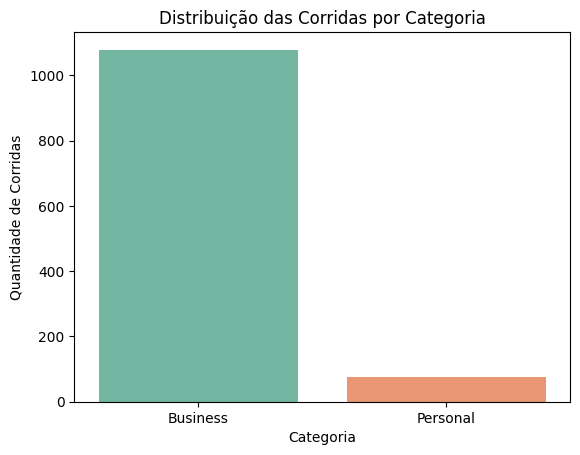

In [23]:
sns.countplot(data=uber, x='CATEGORY', hue='CATEGORY', palette='Set2', legend=False)
plt.title('Distribuição das Corridas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Corridas')
plt.show()

Total de corridas por mês

C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\3221832588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uber, x='MONTH_OF_THE_RIDE', order=[


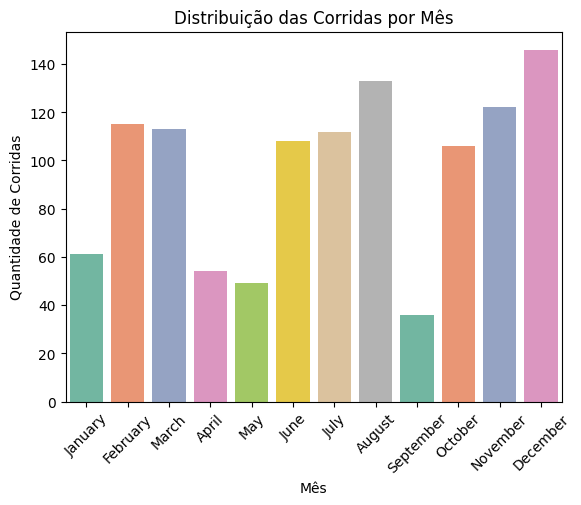

In [24]:
sns.countplot(data=uber, x='MONTH_OF_THE_RIDE', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], palette='Set2', legend=False)
plt.title('Distribuição das Corridas por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Corridas')
plt.xticks(rotation=45)
plt.show()

Total de corridas por dia da semana

C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\158900616.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uber, x='DAY_OF_THE_RIDE', order=[


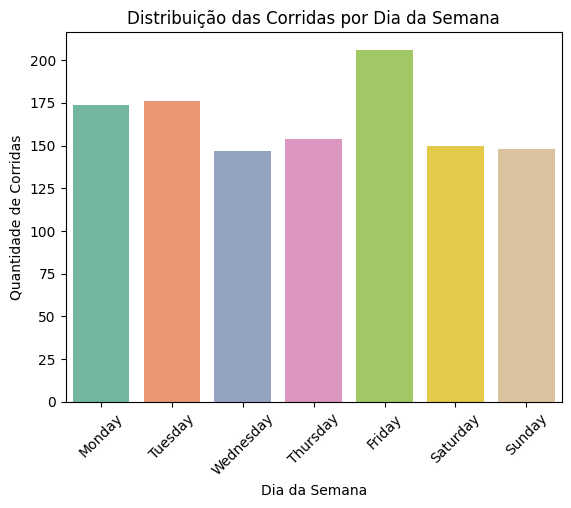

In [25]:
sns.countplot(data=uber, x='DAY_OF_THE_RIDE', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='Set2', legend=False)
plt.title('Distribuição das Corridas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Corridas')
plt.xticks(rotation=45)
plt.show()


Boxplot da duração das corridas por período do dia

C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\246573121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=uber, x='PERIOD_OF_DAY', y='TRIP_DURATION', order=['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT'], palette='Set2')


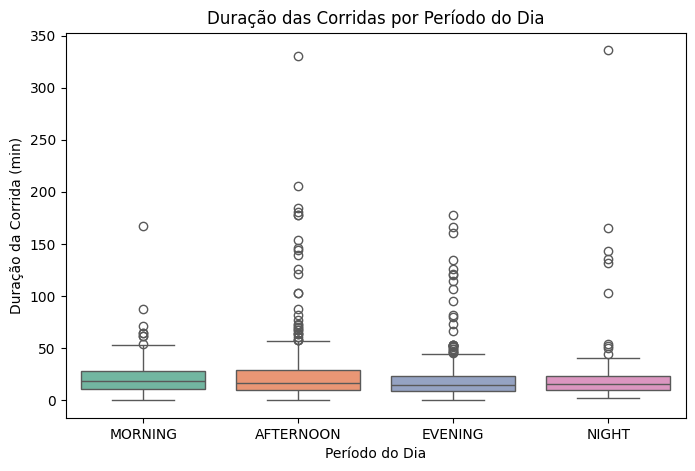

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=uber, x='PERIOD_OF_DAY', y='TRIP_DURATION', order=['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT'], palette='Set2')
plt.title('Duração das Corridas por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Duração da Corrida (min)')
plt.show()

Distribuição das corridas por período do dia

C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\733836386.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uber, x='PERIOD_OF_DAY', order=['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT'], palette='Set2', legend=False)


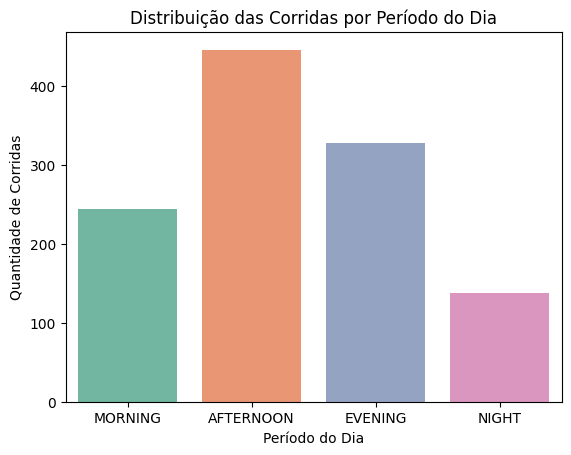

In [27]:
sns.countplot(data=uber, x='PERIOD_OF_DAY', order=['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT'], palette='Set2', legend=False)
plt.title('Distribuição das Corridas por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Quantidade de Corridas')
plt.show()

Distribuição das corridas por período do dia

C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\733836386.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=uber, x='PERIOD_OF_DAY', order=['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT'], palette='Set2', legend=False)


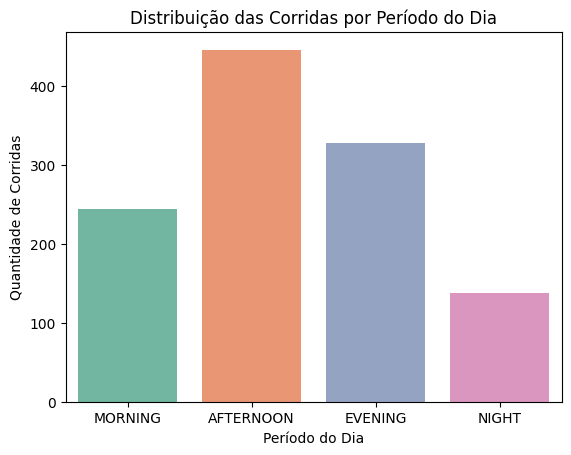

In [28]:
sns.countplot(data=uber, x='PERIOD_OF_DAY', order=['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT'], palette='Set2', legend=False)
plt.title('Distribuição das Corridas por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Quantidade de Corridas')
plt.show()

Total de milhas percorridas por mês

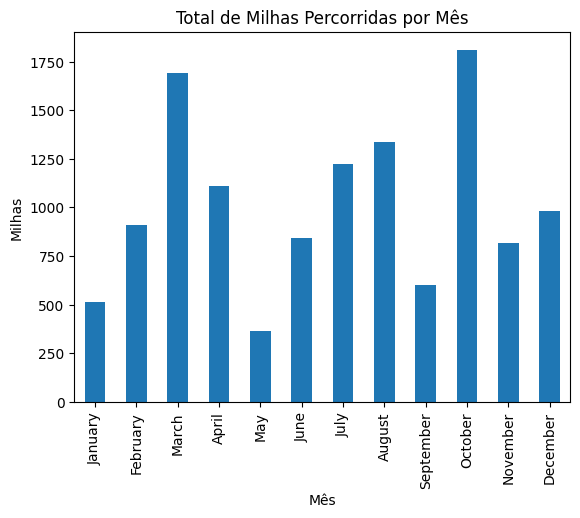

In [29]:
uber.groupby('MONTH_OF_THE_RIDE')['MILES'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).plot(kind='bar')
plt.title('Total de Milhas Percorridas por Mês')
plt.xlabel('Mês')
plt.ylabel('Milhas')
plt.show()

Boxplot da duração das corridas por propósito

C:\Users\lucas\AppData\Local\Temp\ipykernel_3996\2403248399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=uber, x='PURPOSE', y='TRIP_DURATION', palette='Set2')


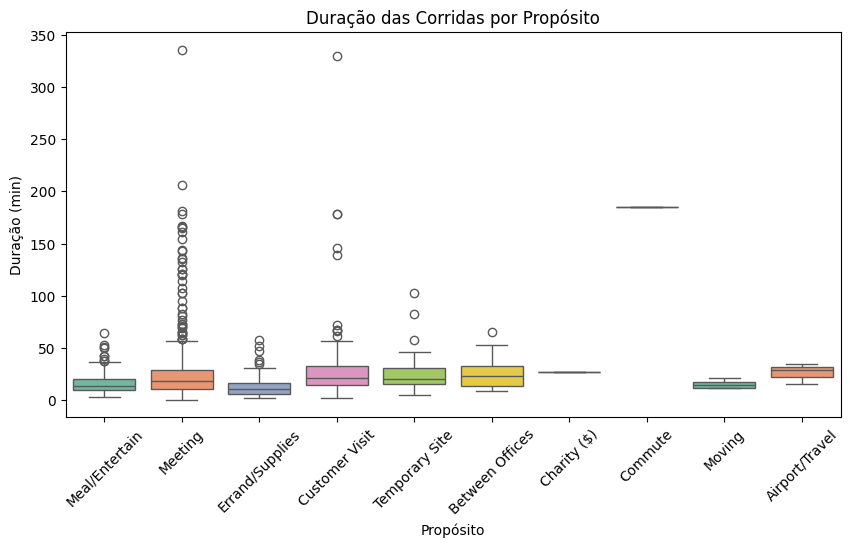

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=uber, x='PURPOSE', y='TRIP_DURATION', palette='Set2')
plt.title('Duração das Corridas por Propósito')
plt.xlabel('Propósito')
plt.ylabel('Duração (min)')
plt.xticks(rotation=45)
plt.show()

Heatmap de corridas por dia da semana e período do dia

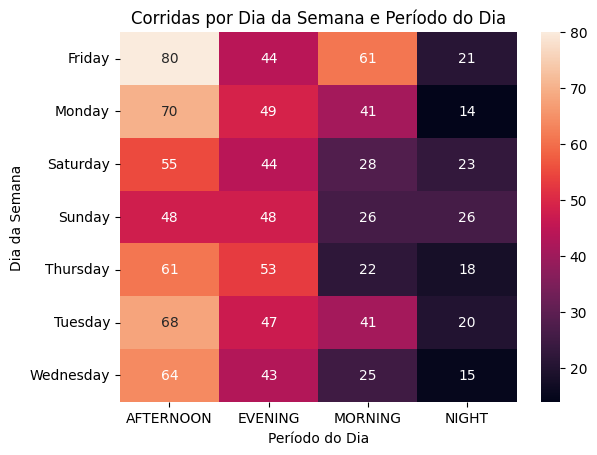

In [31]:
pivot = pd.pivot_table(uber, index='DAY_OF_THE_RIDE', columns='PERIOD_OF_DAY', values='START_DATE', aggfunc='count')
sns.heatmap(pivot, annot=True, fmt='g')
plt.title('Corridas por Dia da Semana e Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Dia da Semana')
plt.show()

;)